# Stochastic windy Grid
---
Stochastic Windy Grid es una nueva implementacion del pasado trabajo Windy grid con una pequena diferencia, ahora la probabilidad de que el viento te mueva no es de 1, si no que es estocastica, osease con una probabilidad p el viento movera al agente el numero de casillas igual a su fuerza

In [1]:
using PyPlot
ioff()

En si, las definiciones previas del problema son practicamente las mismas, con la diferencia de que ahora agregamos probabilidad de que el viento te mueva


In [2]:
WORLD_HEIGHT = 7
WORLD_WIDTH = 10
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]
WIND_PROBABILITY = .9

ACTION_UP = 1
ACTION_DOWN = 2
ACTION_LEFT = 3
ACTION_RIGHT = 4

EPSILON = 0.1
ALPHA = .5
REWARD = -1
START = [4,1]
GOAL = [4,8]
ACTIONS = [ACTION_UP,ACTION_DOWN,ACTION_LEFT,ACTION_RIGHT];

 # Paso
 ---
 Aqui es donde se encuentra el unico cambio que existe en el paso se agrega una condicional que utiliza numeros aleatorios, si se cumple la condicional entonces el paso que va a dar nuestro agente se le sumara el viento de la casilla donde esta parado

In [3]:
function step(state, action)
    i, j = state
    
    if rand() < WIND_PROBABILITY
        wind = WIND[j]
    else
        wind = 0
    end
    if action == ACTION_UP
        return [max(i - 1 - wind, 1), j]
        
    elseif action == ACTION_DOWN
         return [max(min(i + 1 - wind, WORLD_HEIGHT), 1), j]
        
    elseif action == ACTION_LEFT
        return [max(i - wind, 1), max(j - 1, 1)]
        
    elseif action == ACTION_RIGHT
        return [max(i - wind, 1), min(j + 1, WORLD_WIDTH)]
    end
end

step (generic function with 1 method)

### Un episodio
---
En si un episodio es el repetir pasos hasta que se llegue a un objetivo o hasta que llegue a un limite que se haya impuesto.

---
### exploracion y explotacion
---
exploracion en este contexto le llamamos a que vamos a elegir algo que no sea lo mejor que conocemos al momento, con una probabilidad de epsilon, haremos esto que llamamos exploracion, donde simplemente elegiremos al azar una de las acciones, con el objetivo de precisamente explorar mas acciones. LINEA 8 y LINEA 26

Explotacion en este contexto le llamamos a elegir el mejor candidato que conocemos, en este problema es simplemente elegir en la tabla q cual es la mejor accion que posible. LINEA 10 y LINEA 28

---
# Sarsa
---
Sarsa es un algoritmo de aprendizaje para politicas de procesos de decision markoviana. Se basa en una tabla de "valores Q", el algoritmo es bastante sencillo y facil de comprender, dados un estado, una accion, una recompensa, el siguiente estado y la siguiente accion, se puede actualzar la tabla Q en el estado y en la accion. dado (s, a, r, s+1, a+1) 
Q(s,a) = Q(s,a) + α( r + γ * Q(s+1,a+1) - Q(s,a)) LINEA 40

Se aplica sarsa iterativamente hasta llegar al final del episodio o a un limite predefinido, donde siempre se va a calcular la nueva accion o se elegira una al azar dependiendo de si se realiza exploracion o explotacion

In [4]:
function episode(q_value)
    # track the total time steps in this episode
    time = 0
    
    # initialize state
    state = START
    # choose an action based on epsilon-greedy algorithm
    if rand(1)[1] < EPSILON
        action = ACTIONS[rand(1:4)]
    else
        values_ = q_value[state[1], state[2], :]
        action = []
        for i in enumerate(values_)
            action_,value_ = i
            if value_ == maximum(values_)
                push!(action,action_)
            end
        end
        action = action[rand(1:length(action))]
    end
    
    # keep going until get to the goal state
    while state != GOAL

        next_state = step(state,action)
        if rand(1)[1] < EPSILON
            next_action = ACTIONS[rand(1:4)]
        else
            values_ = q_value[next_state[1], next_state[2], :]
            next_action = []
            for i in enumerate(values_)
                action_,value_ = i
                if value_ == maximum(values_)
                    push!(next_action,action_)
                end
            end
            next_action = next_action[rand(1:length(next_action))]
        end
        # Sarsa update
        q_value[state[1], state[2], action] += ALPHA * (REWARD + q_value[next_state[1], next_state[2], next_action] - q_value[state[1], state[2], action])
        state = next_state
        action = next_action
        time += 1
    end

    return time
end

episode (generic function with 1 method)

In [9]:
function print_optimal_policy(q_value)
    optimal_policy = []
    for i in range(1, stop=WORLD_HEIGHT)
        push!(optimal_policy,[])
        for j in range(1, stop=WORLD_WIDTH)
            if [i, j] == GOAL
                append!(optimal_policy[end], 'G')
                continue
            end
            bestAction = argmax(q_value[i, j, :])
            if bestAction == ACTION_UP
                append!(optimal_policy[end], '↑')
            elseif bestAction == ACTION_DOWN
                append!(optimal_policy[end], '↓')
            elseif bestAction == ACTION_LEFT
                append!(optimal_policy[end], '←')
            elseif bestAction == ACTION_RIGHT
                append!(optimal_policy[end], '→')
            end
        end
    end
    for row in optimal_policy
        println(row)
    end
end

print_optimal_policy (generic function with 1 method)

# iterar episodios
---
En este ultimo cuadro antes de los resultados se ve como se corre el algoritmo para un numero de n episodios

In [6]:
function runagent(episode_limit)
    q_value = zeros((WORLD_HEIGHT,WORLD_WIDTH,4))
    steps = []
    ep = 0
    while ep < episode_limit
        push!(steps,episode(q_value))
        ep+=1
    end
    println("SARSA Optimal Policy:")
    print_optimal_policy(q_value)
    println("")
    return steps
end


runagent (generic function with 1 method)

In [11]:
print_optimal_policy(zeros((WORLD_HEIGHT,WORLD_WIDTH,4)))

Any['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑']
Any['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑']
Any['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑']
Any['↑', '↑', '↑', '↑', '↑', '↑', '↑', 'G', '↑', '↑']
Any['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑']
Any['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑']
Any['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑']


Como podemos ver nuestra nueva tabla q es bastante parecida a la primera tabla q sin ser estocastico, esto se debe a que estamos muy cerca a 1, pero igual es una tabla bastante acertada


In [10]:
y = runagent(300);

SARSA Optimal Policy:
Any['→', '→', '→', '→', '→', '→', '→', '→', '→', '↓']
Any['←', '←', '→', '→', '↑', '→', '→', '→', '→', '↓']
Any['→', '→', '→', '→', '→', '→', '↓', '→', '→', '↓']
Any['→', '→', '→', '→', '→', '→', '↑', 'G', '→', '↓']
Any['→', '→', '↓', '→', '→', '→', '→', '↓', '←', '←']
Any['→', '↓', '→', '→', '→', '→', '↑', '↓', '←', '→']
Any['←', '←', '→', '→', '←', '↑', '↑', '↑', '↑', '←']



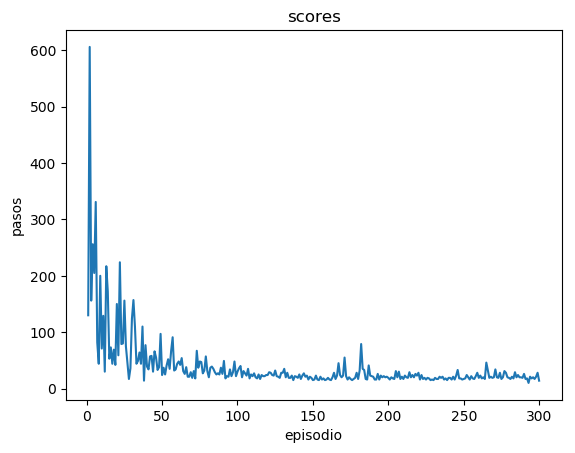

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000253CCE48>

In [8]:
plt[:title]("scores")
plt[:xlabel]("episodio")
plt[:ylabel]("pasos")
plt[:plot]([i for i in 1:length(y)],y)

Viendo la grafica podemos ver que tardo un poco mas que los otros dos ejemplos de windy grid, esto es debido a que hora el agente tiene que luchar contra la suerte, haciendo que los primero episodios de aprendizaje aprenda poco o aprende en base a jugadas con mucha o poca suerte de ser movido con el aire